In [1]:
#importing the necessory libraries 

import pandas as pd 
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
hr=pd.read_csv("hr_comma_sep.csv")

In [3]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [33]:
#performing EDA 
print(hr.isnull().sum())
print(hr.describe)
print(hr.columns)
print(hr.shape)


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [4]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [5]:
dum_hr=pd.get_dummies(hr,drop_first=True) # converting numerical variable into categorical 

In [6]:
dum_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,False,False,False,False,False,False,False,True,False,True,False


In [7]:
X=dum_hr.drop(['left'],axis=1) 
y=dum_hr['left']

In [8]:
X.shape

(14999, 18)

In [9]:
y.shape

(14999,)

In [10]:
#gaussionNB model 
nb=GaussianNB()

In [11]:
params={}    # model_training with default parameter

In [12]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=2022)
gcv=GridSearchCV(nb,param_grid=params,cv=kfold,scoring='neg_log_loss')
gcv.fit(X,y)

print("best_params_gaussionNB:",gcv.best_params_)
print("best_score:",gcv.best_score_)

best_params_gaussionNB: {}
best_score: -0.7181290454863862


In [13]:
#using logistic regression 

lr=LogisticRegression(random_state=2022)
params={}
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=2022)
gcv=GridSearchCV(lr,param_grid=params,cv=kfold,scoring='neg_log_loss')
gcv.fit(X,y)

print("best_params_lr:",gcv.best_params_)
print("best_score:",gcv.best_score_)


best_params_lr: {}
best_score: -0.43288827405230024


In [14]:
#using random_forest

rf=RandomForestClassifier(random_state=2022)

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=2022)
params={'max_depth': [None,3,6],'max_features':[3,5,6]}
gcv=GridSearchCV(rf,param_grid=params,cv=kfold,scoring='neg_log_loss')
gcv.fit(X,y)

print("best_params_rf:",gcv.best_params_)
print("best_score:",gcv.best_score_)


best_params_rf: {'max_depth': None, 'max_features': 6}
best_score: -0.08189159503084319


In [15]:
#print(rf.get_params())

based on the 'neg_log_loss' results are :<br>
1]gaussion_nb with default parameter:best_score: -0.7181290454863862<br>
2]logistic_regression with default parameter:best_score: -0.43288827405230024<br>
3]random_forest_classifier(with params-best_params_rf: {'max_depth': None, 'max_features': 6}:best_score: -0.08189159503084319<br>

conclusion-random_forest_classifier best fit for the above data with log_loss=-0.08189159503084319

Que-2 

In [16]:
from sklearn.cluster import KMeans

In [17]:
nue=pd.read_csv("nutrient.csv",index_col=0)

In [18]:
nue

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7
CHICKEN BROILED,115,20,3,8,1.4
CHICKEN CANNED,170,25,7,12,1.5
BEEF HEART,160,26,5,14,5.9
LAMB LEG ROAST,265,20,20,9,2.6


In [19]:
scaler=StandardScaler()
neu_scaled=scaler.fit_transform(nue)

In [20]:
kmeans=KMeans()

In [21]:
#print(kmeans.get_params())

In [22]:
clust_no=[3,4,5,6,7,8,9,10] 
score=[]

In [23]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt 

In [24]:
for i in clust_no:
    clust=KMeans(n_clusters=i)
    clust.fit(neu_scaled)
    score.append(silhouette_score(neu_scaled,clust.labels_))
    

In [25]:
score

[0.4037719788150674,
 0.42112362599603276,
 0.4010497090775227,
 0.3814688639441237,
 0.36069090402535686,
 0.3582354540837027,
 0.3870719025096509,
 0.37145059412642184]

In [26]:
# finding the best score and cluster 
i_max=np.max(score)
i_max

0.42112362599603276

plotting the line graph based on the silhouette score 

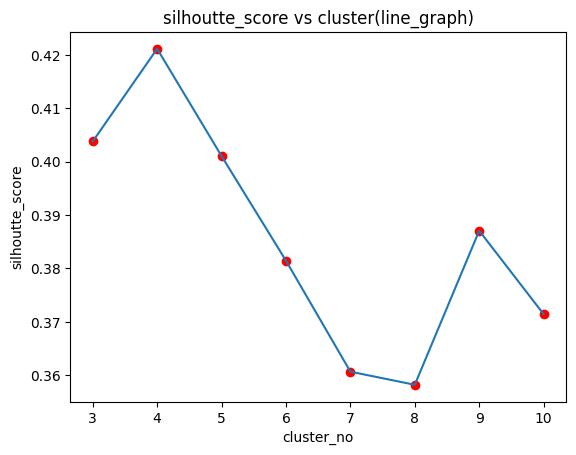

In [27]:
plt.scatter(clust_no,score,c='r')     
plt.plot(clust_no,score)
plt.xlabel("cluster_no")
plt.ylabel("silhoutte_score")
plt.title("silhoutte_score vs cluster(line_graph)")
plt.show()

Question-2 (B)

In [28]:
from sklearn.decomposition import PCA 

In [29]:
#finding the no of components which capture at least 70 % variation 

In [30]:
comp=[2,3,4]
score=[]
for i in comp:
    pca=PCA(n_components=i)
    pca.fit(nue)
    score.append(pca.explained_variance_ratio_)
    

In [31]:
score

[array([0.70103278, 0.29758083]),
 array([0.70103278, 0.29758083, 0.00123947]),
 array([7.01032777e-01, 2.97580833e-01, 1.23946949e-03, 1.25556971e-04])]

based on the above result we can conclude that no . principle_componants=2, which capture at least 70% variation.

In [32]:
#print(pca.get_params())